In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtain and review raw data

In [5]:
df_activities = pd.read_csv('cardioActivities.csv', parse_dates=['Date'], index_col='Date')
display(df_activities.sample(3))
print(df_activities.info())

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-08-22 18:25:22,503a12b4-9a16-4c63-bbcd-be528ae0787a,Running,NaN,4.38,33:55,7:45,7.75,334.0,60,138.0,NaN,NaN,2018-08-22-182522.gpx
2016-09-22 18:52:22,1454fad1-9940-448a-82fb-8ae9f3bf05e5,Running,NaN,6.96,37:14,5:21,11.22,494.0,63,135.0,NaN,TomTom MySports Watch,2016-09-22-185222.gpx
2014-02-15 08:55:15,9d8d9396-b49a-439d-a31d-c300bcd7b621,Running,NaN,6.29,34:34,5:30,10.91,449.0,35,NaN,NaN,NaN,2014-02-15-085515.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

In [6]:
df_activities.describe()

,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged
count,508.000000,508.000000,5.080000e+02,508.00000,294.000000,0.0
mean,11.757835,11.341654,1.878197e+04,128.00000,143.530612,NaN
std,6.209219,2.510516,2.186930e+05,108.52604,10.583848,NaN
min,0.760000,1.040000,4.000000e+01,0.00000,77.000000,NaN
25%,7.015000,10.470000,4.917500e+02,53.00000,140.000000,NaN
50%,11.460000,11.030000,7.280884e+02,92.00000,144.000000,NaN
75%,13.642500,11.642500,9.212500e+02,172.25000,149.000000,NaN
max,49.180000,24.330000,4.072685e+06,982.00000,172.000000,NaN


# Data preprocessing

In [7]:
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned','Notes']
df_activities = df_activities.drop(columns=cols_to_drop)
display(df_activities['Type'].value_counts())
df_activities['Type'] = df_activities['Type'].str.replace('Other', 'Unicycling')
print(df_activities.isnull().sum())

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64


# Dealing with missing values

In [8]:
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)

print(df_run.isnull().sum())

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64


# Plot running data

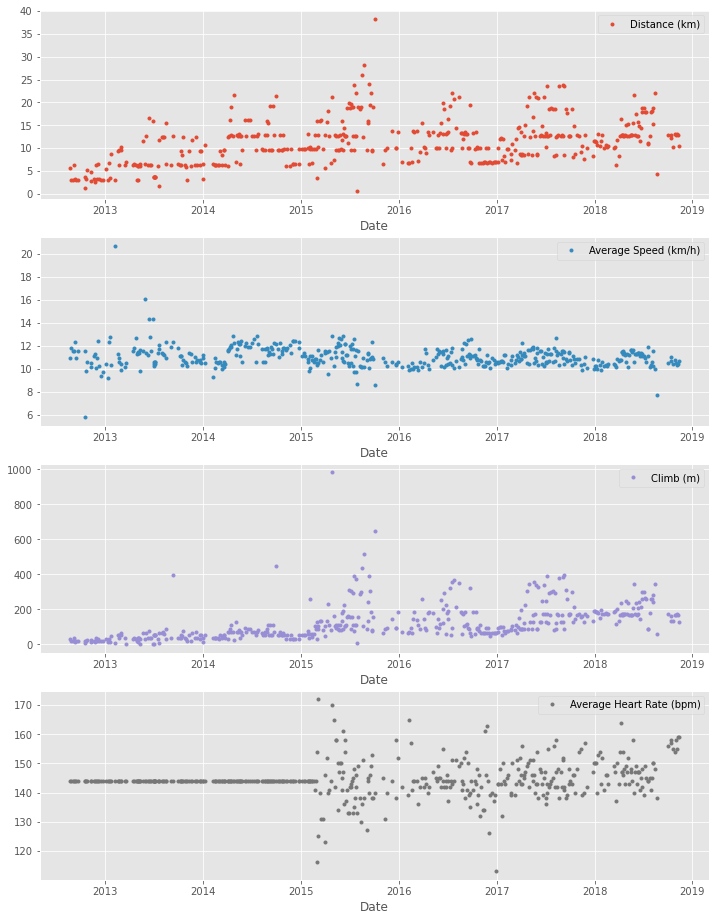

In [9]:
plt.style.use('ggplot')
runs_subset_2013_2018 = df_run
runs_subset_2013_2018.plot(subplots=True,sharex=False,figsize=(12,16),linestyle='none',marker='o',markersize=3,)
plt.show()

# Running statistics

In [10]:
runs_subset_2015_2018 = df_run.iloc[:303]


print('How my average run looks in last 4 years:')
display(runs_subset_2015_2018.resample('A').mean())


print('Weekly averages of last 4 years:')
display(runs_subset_2015_2018.resample('W').mean().mean())


weekly_counts_average = runs_subset_2015_2018['Distance (km)'].resample('A').mean().count()
print('How many trainings per week I had on average:', weekly_counts_average)

How my average run looks in last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of last 4 years:


Distance (km)                12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.801775
dtype: float64

How many trainings per week I had on average: 4


# Visualization with averages

C:\Users\SEETHU\AppData\Local\Temp\ipykernel_17004\2094087466.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  runs_subset_2015_2018 = df_run['2015':'2018']


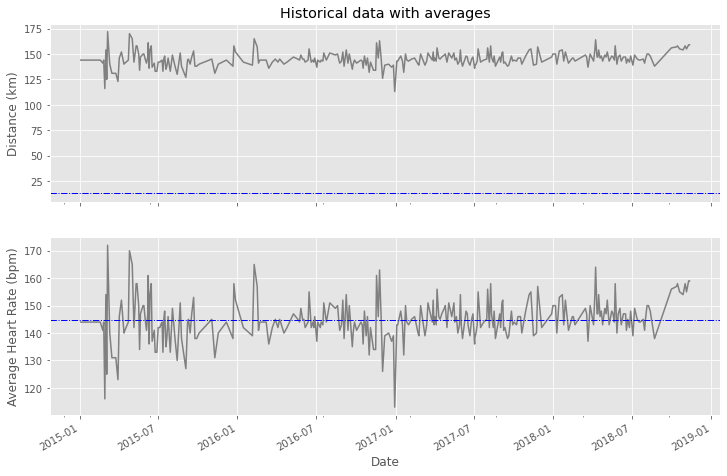

In [12]:
runs_subset_2015_2018 = df_run['2015':'2018']
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,8))


runs_hr.plot(ax=ax1, color='gray')
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')


runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')


plt.show()

# Did I reach my goals?

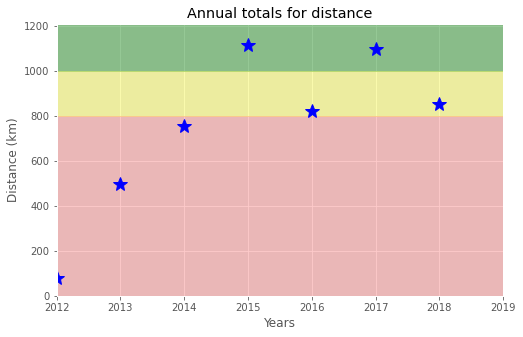

In [13]:
df_run_dist_annual = df_run['Distance (km)'].resample('A').sum()


fig = plt.figure(figsize=(8,5))


ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)


plt.show()

# Am I progressing?

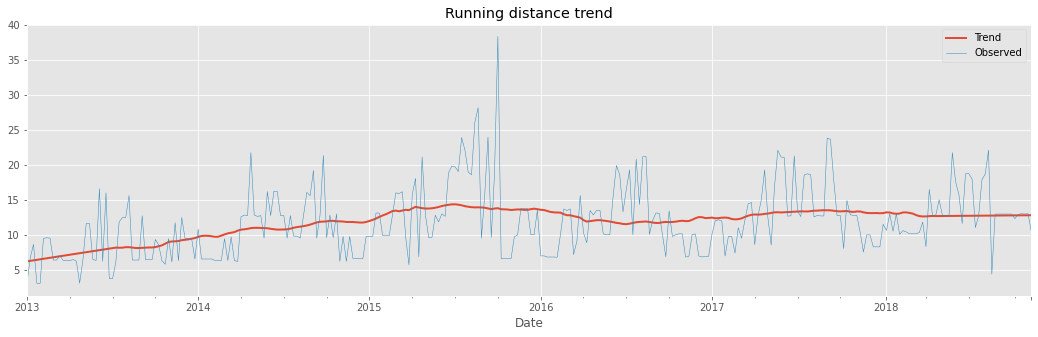

In [15]:
import statsmodels.api as sm


df_run_dist_wkly = df_run.query("(Date <= 2019) and (Date >= 2013)")["Distance (km)"].resample("W").bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1)


fig = plt.figure(figsize=(18, 5))


ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')


plt.show()

# Training intensity

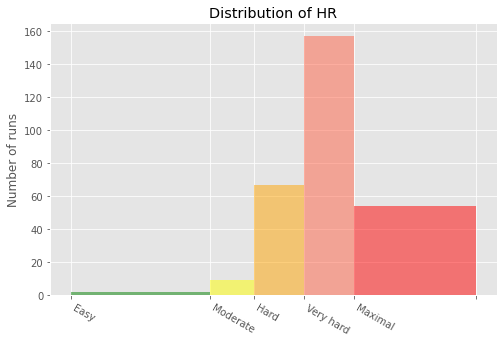

In [17]:
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal', ""]
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run.query("(Date <= 2019) and (Date >= '2015-03')")["Average Heart Rate (bpm)"]


fig, ax = plt.subplots(figsize=(8, 5))

n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')


plt.show()

# Detailed summary report

In [18]:
frames = [df_walk, df_cycle]
df_run_walk_cycle = df_run.append(frames, sort=False)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']


df_totals = df_run_walk_cycle.groupby('Type').sum()

print('Totals for different training types:')
display(df_totals)

 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()


for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
print(df_summary.stack())

Totals for different training types:


C:\Users\SEETHU\AppData\Local\Temp\ipykernel_17004\4327926.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_run_walk_cycle = df_run.append(frames, sort=False)


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Type,,,,
Cycling,680.58,554.63,6976,3602.0
Running,5224.50,5074.84,57278,66369.0
Walking,33.45,99.89,349,1980.0


Summary statistics for different training types:
               Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    45

# Fun facts

In [19]:
average_shoes_lifetime = 5224/7

shoes_for_forrest_run = 24700//average_shoes_lifetime

print('Forrest Gump would need {} pairs of shoes!'.format(shoes_for_forrest_run))

Forrest Gump would need 33.0 pairs of shoes!
